# Task 4.10

## Contents
#### Import Libraries & Data
#### Create a regional segmentation of the data
#### Determine whether there’s a difference in spending habits between the different U.S. regions
#### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data
#### Customer Profiling
#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### Compare customer profiles to regions
#### Compare customer profiles to departments
#### Final Visualizations

## Import Libraries & Data

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
# Import dataframe
path = r'C:\\Users\\sstorer\\OneDrive\\Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

## Create a regional segmentation of the data

In [12]:
df.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_since_prior_order,order_frequency,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [277]:
# Create a list grouping states by US region
result = []

for value in df["state"]:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append("Northeast")
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append("Midwest")
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida' 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append("South")
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    result.append("West")
  else:
    result.append("No region assigned")

In [279]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Wes

In [281]:
# Create a new region column to display the results
df['region'] = result

## Determine whether there’s a difference in spending habits between the different U.S. regions

In [25]:
# Cross the spending flag column with the region column
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [26]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,144162,6820447
West,225883,11894306


For all US regions, there are more low spenders than high spenders.

## Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [37]:
# Create a flag for customers with less than 5 orders
df.loc[df['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
df.loc[df['max_order'] > 5, 'activity_flag'] = 'high-activity customer'

In [35]:
# Check value counts for activity flag
df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30171424
low-activity customer      1440295
NaN                         793140
Name: count, dtype: int64

In [39]:
# Exclude low-activity customers from the dataframe
df_excluded = df[df['activity_flag'] != 'low-activity customer']

In [40]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

## Customer Profiling

### Profiling based on age

In [47]:
# Create an age group variable
df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['age'] > 25) & (df_excluded['age'] <= 44), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['age'] > 44) & (df_excluded['age'] <= 64), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['age'] > 64, 'age_group'] = 'senior'

C:\Users\sstorer\AppData\Local\Temp\ipykernel_3488\2854730798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'


In [49]:
df_excluded.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,activity_flag,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,adult
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,adult
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,adult
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,adult
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,adult


In [55]:
# Check value counts for each age group
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    9690051
adult          9214451
senior         8195544
young adult    3864518
Name: count, dtype: int64

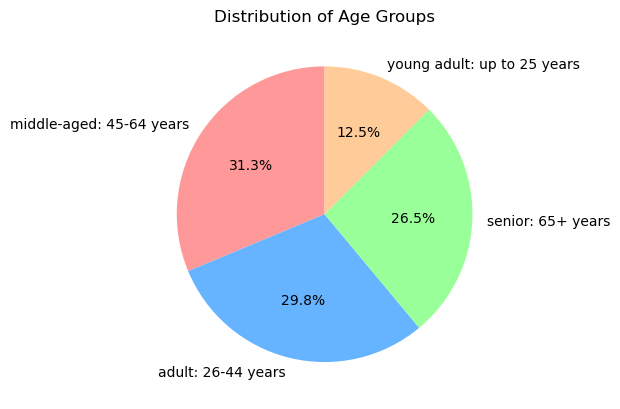

In [63]:
# Make a pie chart showing the distribution of age groups
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [65]:
# Export chart
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

### Profiling based on income

In [70]:
# Create an income group variable
df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['income'] > 55000) & (df_excluded['income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['income'] > 150000, 'income_group'] = 'high-income'

C:\Users\sstorer\AppData\Local\Temp\ipykernel_3488\1030381792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'


In [72]:
# Check the counts of income groups
df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    22617642
low-income        4452388
high-income       3894534
Name: count, dtype: int64

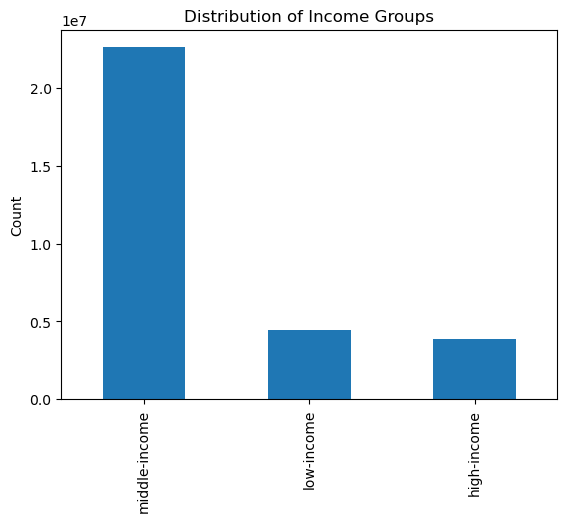

In [86]:
# Make a bar chart showing the distribution of income groups
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [88]:
# Export the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar.png'))

### Profiling based on dependents

In [96]:
# Create a dependents flag
df_excluded.loc[df_excluded['number_of_dependents'] == 0, 'dependents_flag'] = 'no dependents'
df_excluded.loc[df_excluded['number_of_dependents'] >= 1, 'dependents_flag'] = 'has dependents'

C:\Users\sstorer\AppData\Local\Temp\ipykernel_3488\8769066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['number_of_dependents'] == 0, 'dependents_flag'] = 'no dependents'


In [98]:
# Check value counts
df_excluded['dependents_flag'].value_counts(dropna = False)

dependents_flag
has dependents    23224883
no dependents      7739681
Name: count, dtype: int64

### Profiling based on marital status / dependents

In [101]:
# Create a crosstab of marital_status and dependents_flag
crosstab_2 = pd.crosstab(df_excluded['marital_status'], df_excluded['dependents_flag'], dropna = False)
crosstab_2

dependents_flag,has dependents,no dependents
marital_status,,
divorced/widowed,0,2645271
living with parents and siblings,1481172,0
married,21743711,0
single,0,5094410


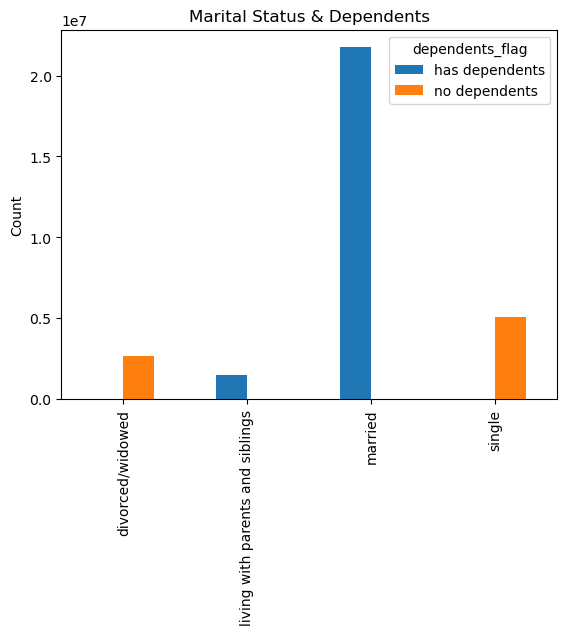

In [105]:
# Create a bar chart showing the distribution of the crosstab
marital_status_dependents_bar = crosstab_2.plot.bar()
plt.title('Marital Status & Dependents')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [107]:
# Export the chart
marital_status_dependents_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_status_dependents_bar.png'))

### Profiling based on marital status / age group

In [110]:
# Create a crosstab of marital_status and age_group
crosstab_3 = pd.crosstab(df_excluded['marital_status'], df_excluded['age_group'], dropna = False)
crosstab_3

age_group,adult,middle-aged,senior,young adult
marital_status,,,,
divorced/widowed,0,623313,2021958,0
living with parents and siblings,0,0,0,1481172
married,6901266,7238740,6173586,1430119
single,2313185,1827998,0,953227


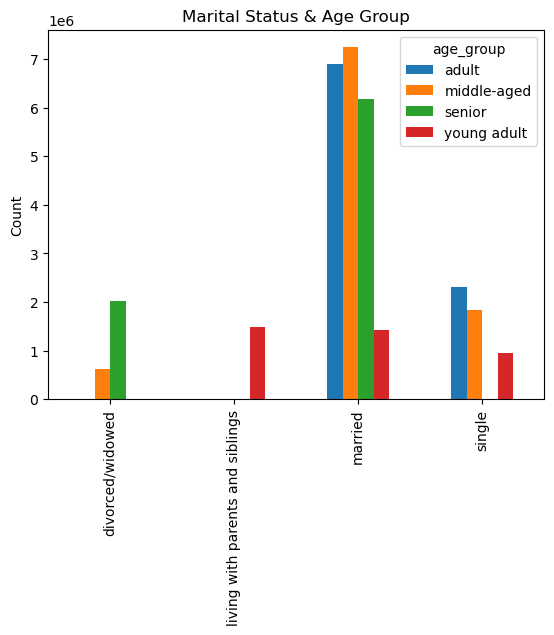

In [118]:
# Create a bar chart
marital_status_age_group_bar = crosstab_3.plot.bar()
plt.title('Marital Status & Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [120]:
# Export the chart
marital_status_age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_status_age_group_bar.png'))

In [200]:
# Cross order frequency with age group
frequency_age_cross = pd.crosstab(df_excluded['order_frequency'], df_excluded['age_group'], dropna = False)
frequency_age_cross

age_group,adult,middle-aged,senior,young adult
order_frequency,,,,
Frequent customer,6309385,6610186,5630976,2653929
Non-frequent customer,848176,928228,760132,358439
Regular customer,2056890,2151637,1804436,852150


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

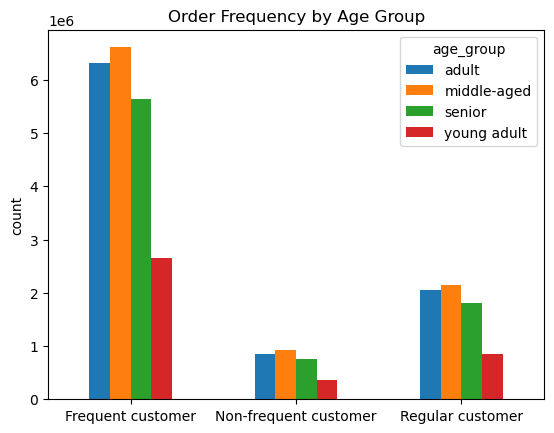

In [204]:
# Make a bar chart to more easily show results
frequency_age_bar = frequency_age_cross.plot.bar()
plt.title('Order Frequency by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [206]:
# Export the chart
frequency_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_age_group_bar.png'))

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [123]:
df_excluded.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', 'region',
       'activity_flag', 'age_group', 'income_group', 'dependents_flag'],
      dtype='object')

In [176]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_excluded.groupby(['user_id', 'gender', 'state', 'region', 'number_of_dependents', 'marital_status', 'age_group', 'number_of_orders', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'order_frequency', 'dependents_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index() 

In [142]:
customer_profile.head()

,user_id,gender,state,region,number_of_dependents,marital_status,age_group,number_of_orders,orders_day_of_week,order_hour_of_day,loyalty_flag,order_frequency,dependents_flag,income_group,spending_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,New customer,Non-frequent customer,has dependents,low-income,Low spender,31.6
1,1,Female,Alabama,South,3,married,adult,2,3,7,New customer,Non-frequent customer,has dependents,low-income,Low spender,35.4
2,1,Female,Alabama,South,3,married,adult,3,3,12,New customer,Non-frequent customer,has dependents,low-income,Low spender,28.2
3,1,Female,Alabama,South,3,married,adult,4,4,7,New customer,Non-frequent customer,has dependents,low-income,Low spender,26.0
4,1,Female,Alabama,South,3,married,adult,5,4,15,New customer,Non-frequent customer,has dependents,low-income,Low spender,57.0


In [159]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'number_of_orders': ['max', 'min', 'mean'], 
                                                         'prices': ['max', 'min', 'mean']})

In [153]:
customer_agg

number_of_orders           prices                   
                     max min  mean    max    min        mean
user_id                                                     
1                     10   1   5.5   63.1   25.0   37.570000
2                     14   1   7.5  213.1   19.0  104.685714
3                     12   1   6.5  107.2   30.7   60.116667
4                      5   1   3.0   63.4   10.8   29.540000
7                     20   1  10.5  166.7    6.3   76.910000
...                  ...  ..   ...    ...    ...         ...
206203                 5   1   3.0  216.3  126.6  169.900000
206206                67   1  34.0  157.3    9.6   32.526866
206207                16   1   8.5  200.8   42.8  101.931250
206208                49   1  25.0  238.5   38.7  115.595918
206209                13   1   7.0  131.5   11.1   70.046154

[162631 rows x 6 columns]

In [161]:
# Aggregate variables for customer profiles for usage frequency
df_agg = df_excluded.groupby('user_id').agg({'number_of_orders': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [156]:
df_agg

number_of_orders                days_since_prior_order        \
                     max min       mean                    max   min   
user_id                                                                
1                     10   1   5.813559                   30.0   0.0   
2                     14   1   8.035897                   30.0   3.0   
3                     12   1   6.000000                   21.0   7.0   
4                      5   1   2.888889                   21.0   0.0   
7                     20   1   9.645631                   30.0   2.0   
...                  ...  ..        ...                    ...   ...   
206203                 5   1   2.983193                   30.0  27.0   
206206                67   1  38.007018                   15.0   0.0   
206207                16   1   8.116592                   30.0   1.0   
206208                49   1  25.505170                   20.0   0.0   
206209                13   1   6.937984                   30.0   3.0   

                    
              mean  
user_id             
1        20.259259  
2        15.967033  
3        11.487179  
4        15.357143  
7        13.546392  
...            ...  
206203   29.103093  
206206    4.042705  
206207   14.879397  
206208    7.442105  
206209   20.275862  

[162631 rows x 6 columns]

## Compare customer profiles to regions

In [164]:
# Create a crosstab of age group and region
age_region_cross = pd.crosstab(df_excluded['age_group'], df_excluded['region'], dropna = False)
age_region_cross

region,Midwest,Northeast,South,West
age_group,,,,
adult,2172833,1602358,1979789,3459471
middle-aged,2286479,1697611,2067065,3638896
senior,1904046,1484807,1762934,3043757
young adult,898155,679909,846531,1439923


(array([0, 1, 2, 3]),
 [Text(0, 0, 'adult'),
  Text(1, 0, 'middle-aged'),
  Text(2, 0, 'senior'),
  Text(3, 0, 'young adult')])

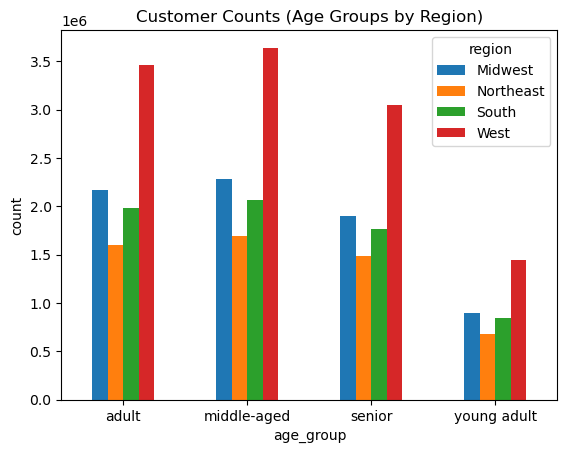

In [168]:
age_group_region_bar = age_region_cross.plot.bar()
plt.title('Customer Counts (Age Groups by Region)')
plt.ylabel('count')
plt.xticks(rotation=0)

In [283]:
# Create a crosstab to show spending power by region
income_region_cross = pd.crosstab(df_excluded['income_group'], df_excluded['region'], dropna = False)

In [284]:
income_region_cross

region,Midwest,Northeast,South,West
income_group,,,,
high-income,916961,677680,844273,1455620
low-income,1025408,789479,974682,1662819
middle-income,5319144,3997526,4837364,8463608


(array([0, 1, 2]),
 [Text(0, 0, 'high-income'),
  Text(1, 0, 'low-income'),
  Text(2, 0, 'middle-income')])

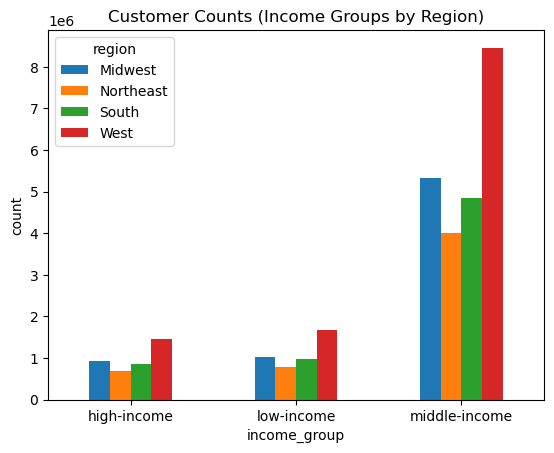

In [308]:
# Make a bar chart to more easily show results
income_region_bar = income_region_cross.plot.bar()
plt.title('Customer Counts (Income Groups by Region)')
plt.ylabel('count')
plt.xticks(rotation=0)

In [180]:
# Export bar charts
age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_region_bar.png'))
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

In [182]:
# Create a crosstab to show order frequency by region
frequency_region_cross = pd.crosstab(df_excluded['order_frequency'], df_excluded['region'], dropna = False)

In [183]:
frequency_region_cross

region,Midwest,Northeast,South,West
order_frequency,,,,
Frequent customer,4935393,3740982,4541729,7986372
Non-frequent customer,690030,496911,628899,1079135
Regular customer,1636090,1226792,1485691,2516540


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

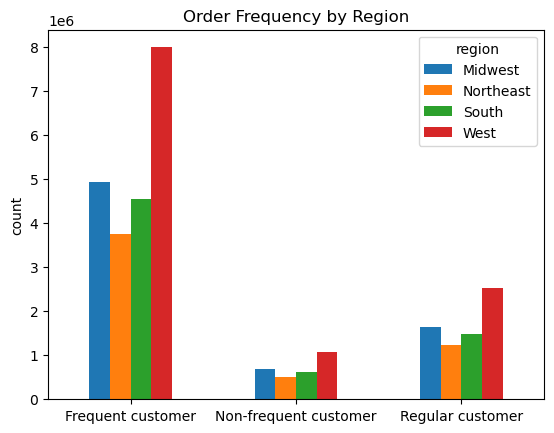

In [188]:
# Make a bar chart to more easily show results
frequency_region_bar = frequency_region_cross.plot.bar()
plt.title('Order Frequency by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [190]:
# Export bar chart
frequency_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_region_bar.png'))

In [192]:
# Create a crosstab to show customer loyalty by region
loyalty_region_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['region'], dropna = False)

In [193]:
loyalty_region_cross

region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal customer,2373774,1841785,2199248,3869286
New customer,1136761,842156,1037908,1786870
Regular customer,3750978,2780744,3419163,5925891


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

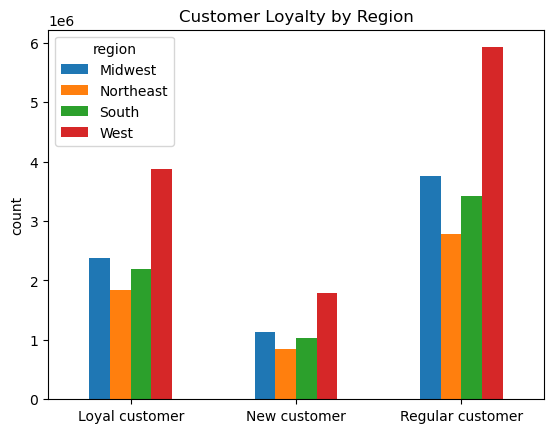

In [196]:
# Make a bar chart to more easily show results
loyalty_region_bar = loyalty_region_cross.plot.bar()
plt.title('Customer Loyalty by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [198]:
# Export bar chart
loyalty_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_region_bar.png'))

In [208]:
# Create a crosstab of spending flag and region
spender_region_cross = pd.crosstab(df_excluded['spending_flag'], df_excluded['region'], dropna = False)
spender_region_cross

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,148678,103120,137775,213852
Low spender,7112835,5361565,6518544,11368195


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

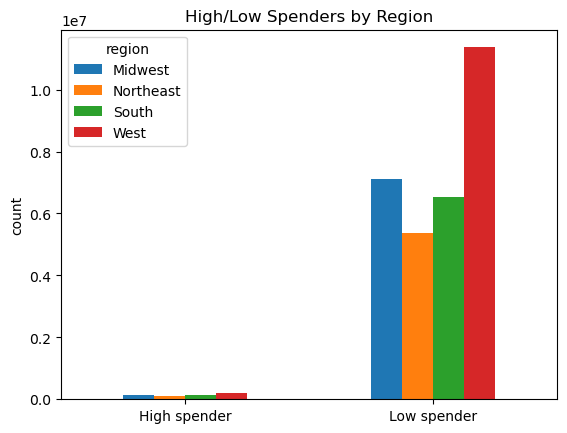

In [306]:
# Make a bar chart to more easily show results
spender_region_bar = spender_region_cross.plot.bar()
plt.title('High/Low Spenders by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [212]:
# Export bar chart
spender_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spender_region_bar.png'))

## Compare customer profiles to departments

In [215]:
# Import departments dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [217]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [219]:
# Rename unnamed column
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [221]:
df_excluded.dtypes

order_id                           int64
user_id                            int64
number_of_orders                   int64
orders_day_of_week                 int64
order_hour_of_day                  int64
days_since_prior_order           float64
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
price_range_loc                   object
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
avg_price                        float64
spending_flag                     object
median_days_since_prior_order    float64
order_frequency                   object
gender                            object
state           

In [223]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

In [229]:
df_final_merged = df_excluded.merge(df_dept, on='department_id', indicator=True)

In [231]:
df_final_merged['_merge'].value_counts(dropna = False)

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [233]:
# Dropping merge column
df_final_merged = df_final_merged.drop(columns=['_merge'])

In [234]:
df_final_merged.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependents,marital_status,income,region,activity_flag,age_group,income_group,dependents_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependents,beverages
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependents,dairy eggs
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependents,snacks
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependents,snacks
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,2/17/2019,3,married,40423,South,high-activity customer,adult,low-income,has dependents,household


In [237]:
# Exporting new dataframe with department merged 
df_final_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

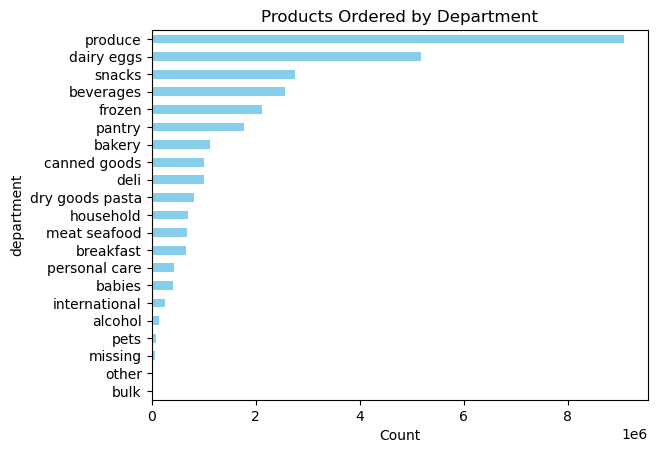

In [249]:
# Make a bar chart showing the frequency of orders for each department
depts_bar = df_final_merged['department'].value_counts(ascending=True).plot(kind='barh', color='skyblue', xlabel = 'Count', title='Products Ordered by Department')

In [304]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar.png'))

In [253]:
# Create a crosstab of age group and department
age_dept_cross = pd.crosstab(df_final_merged['age_group'], df_final_merged['department'], dropna = False)
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,42167,123044,334154,754851,198803,9902,302479,1549127,299970,243702,...,207553,76675,199124,19130,10198,529307,125522,27034,2712590,824677
middle-aged,46579,129910,350804,814687,211274,10298,315774,1612490,314110,256920,...,218860,79743,209927,20340,10811,558929,134736,28293,2830853,867564
senior,36693,106204,295997,684020,175296,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111052,25115,2408104,728549
young adult,19188,51234,139873,318343,85477,4306,126312,647493,124555,104198,...,86814,32374,84580,8383,4456,222086,52996,12618,1127726,345616


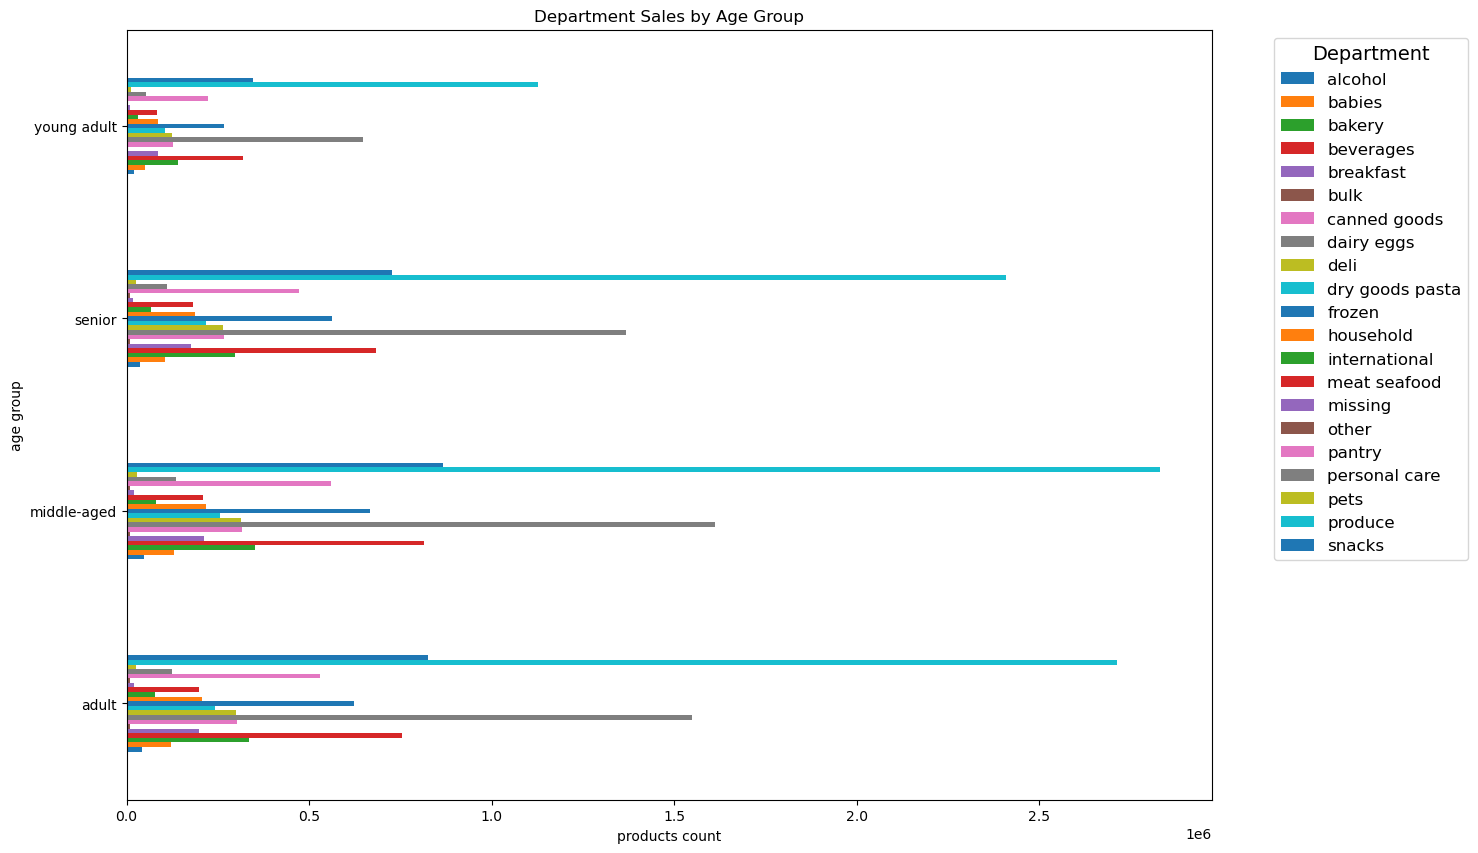

In [267]:
# Make a bar chart to more easily show results
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [269]:
# Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depts_bar.png'))

In [271]:
# Create a crosstab of income group and department
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,24067,53001,148430,313325,83418,3671,132389,659149,125886,106335,...,92674,32822,91514,8253,4554,231915,53530,12991,1134490,305779
low-income,22199,43438,144086,479742,116540,5974,112945,680816,141758,92401,...,111508,30240,54717,8902,4958,226221,62888,11782,1139552,673753
middle-income,98361,313953,828312,1778834,470892,23806,766740,3837217,736190,623400,...,495675,192929,528550,47613,24899,1324569,307888,68287,6805231,1786874


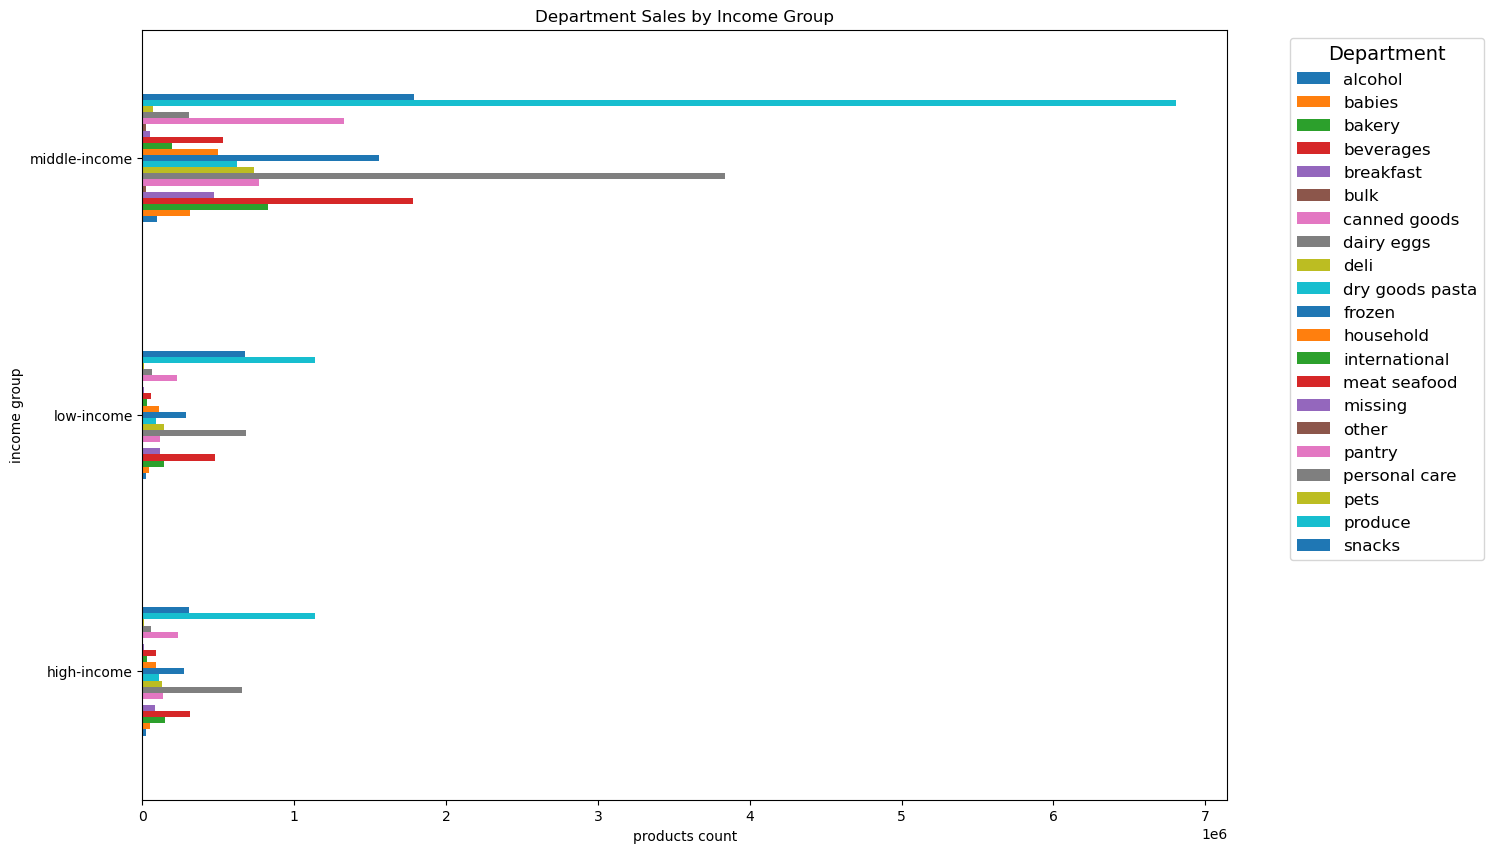

In [273]:
# Make a bar chart to more easily show results
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [275]:
# Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_depts_bar.png'))

## Final Visualizations

[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Friday'),
 Text(3, 0, 'Monday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

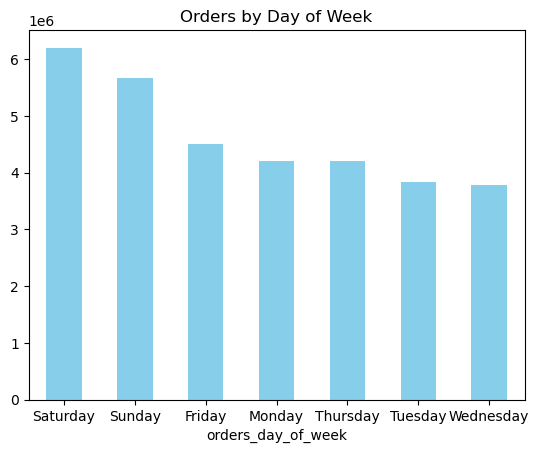

In [294]:
# Create a bar chart showing orders by day of week
orders_dow_bar = df['orders_day_of_week'].value_counts().plot.bar(color = 'skyblue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'], rotation=0)

In [296]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar.png'))

Text(0.5, 1.0, 'Orders by Hour of Day')

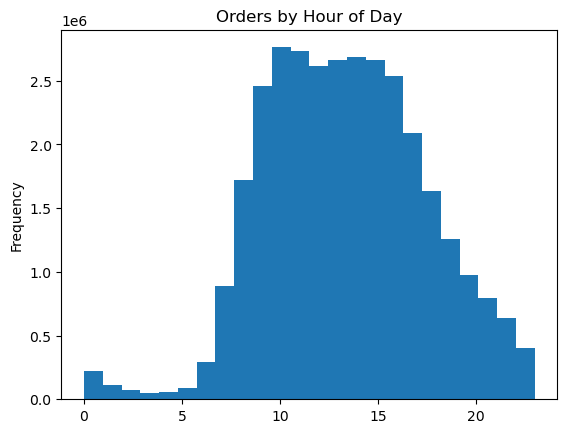

In [300]:
# Create a histogram for the order_hour_of_day column
hist_hod = df['order_hour_of_day'].plot.hist(bins = 24)
hist_hod.set_title('Orders by Hour of Day')

In [302]:
# Export histogram
hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))